# *CREDIT CARD FRAUD DETECTION BY ARTIFICIAL NEURAL NETWORK*

## *BY SRIKAR SEETHIRAJU*

## Aim : Predicting if the Credit Card Transaction is fraud using data from CSV file.

## Method of approach used : DECISION TREE CLASSIFICATION

- STEP #1: IMPORTING DATA
- STEP #2: DATA PREPROCESSING
- STEP #3: MODEL TRAINING
- STEP #4: EVALUATING THE MODEL

---

# STEP #1: IMPORTING DATA

In [1]:
import pandas as pd
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import seaborn as sns

### Data exploration

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


---

# STEP #2: DATA PREPROCESSING

### Dropping Useless columns

In [4]:
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Splitting dataframe into Input and Output

In [5]:
X = data.iloc[:, data.columns != 'Class'].values
y = data.iloc[:, data.columns == 'Class'].values

### Splitting data into Test set and Training set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

---

# STEP #3: MODEL TRAINING

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

### Deep neural network

In [9]:
model = Sequential([
    Dense(units=16, activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(20,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),
])

### Training

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=16,epochs=5)

Epoch 1/5
12461/12461 [==============================] - 61s 2ms/step - loss: 0.0220 - accuracy: 0.9981
Epoch 2/5
12461/12461 [==============================] - 23s 2ms/step - loss: 0.0039 - accuracy: 0.9994
Epoch 3/5
12461/12461 [==============================] - 21s 2ms/step - loss: 0.0033 - accuracy: 0.9995
Epoch 4/5
12461/12461 [==============================] - 20s 2ms/step - loss: 0.0030 - accuracy: 0.9995
Epoch 5/5
12461/12461 [==============================] - 20s 2ms/step - loss: 0.0035 - accuracy: 0.9994


---

# STEP #4: EVALUATING THE MODEL

### Prediction

In [11]:
y_pred = (model.predict(X_test)>0.5)

### Evaluation score

In [12]:
score = model.evaluate(X_test, y_test)
print(score)

2671/2671 [==============================] - 4s 1ms/step - loss: 0.0035 - accuracy: 0.9993
[0.003486854489892721, 0.9992509484291077]


### Accuracy Score

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix
acc = accuracy_score(y_test, y_pred)
acc

0.9992509626300574

### Confusion Matrix

In [14]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[85270,    30],
       [   34,   109]], dtype=int64)

### Heat Map Visualisation

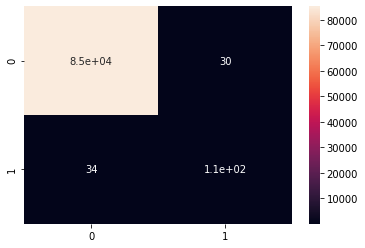

In [15]:
sns.heatmap(cm, annot=True)

---

# END OF PROJECT

---